# ML Tech Interview

Hello and welcome to the Machine Learning Tech Interview. This interview will be divided in two parts: the theoretical part and the practical/coding part. 

### **I will review only the scripts that will be sent (by pull request on this repo) by 1:00 pm**

Good Luck!!

## Theoretical Part

Please answer the following questions. 

#### What are the assumptions of a linear model (or any other type of model)?

The linear model, and any other type of machine learning model assume that for the same independent variables the value of the dependent variable will be the same.  

#### What’s the difference between K Nearest Neighbor and K-means Clustering?

The K Nearest Neighbour is used in supervised learning and the K-means Clustering is used for unsupervised learning.  

#### How do you address overfitting?

Overfitting happens when our model doesn’t have enough training data or is too complex, so during the training the model is not able to separate the noise from the data. This is identified when the performance from the training and the test is different. To address this problem first we need to add more data when is disponible. If we don’t have enough data available, a solution can be to reduce the number of features or regularization.  

#### Explain Naive Bayes algorithms.

Naïve Bayes algorithms are classification models used frequently in Natural Language Processing. This model assumes that all the probabilities are independent of each other based on the Bayes theorem.  

#### When do you use an AUC-ROC score? What kind of information can you gather from it?

AUC-ROC stands for "Area Under the Curve - Receiver Operating Characteristics". This can be used when we want to visualize the accuracy of the model.  This model plots the True Positive Rate (Recall or Sensitivity) against the False Positive Rate. The result of the model is the area between the 2 curves.  

#### What is cross validation?

Cross validation is a technique used to validate our dataset. Consists in dividing our training values in k parts. After that, we run the model in each segment, and of each k a different part of the data set is used as the test. This technique allows us to see if there is a part of the dataset with a difference from the rest of the dataset. 

#### What are confounding variables?

Confounding variables are variables that can have a hidden effect on the results. These variables can increase the variance and introduce bias.  

#### If an important metric for our company stopped appearing in our data source, how would you investigate the causes?

First, I would check the program that obtains the dataset to see if it is an error.   

## Practical Machine Learning

In this challenge, you will showcase your knowledge in feature engineering, dimensionality reduction, model selection and evaluation, hyperparameter tuning, and any other techniques of machine learning.

There isn't a correct solution to this challenge. All we would like to learn is your thinking process that demonstrates your knowledge, experience, and creativity in developing machine learning models. Therefore, in addition to developing the model and optimizing its performance, you should also elaborate your thinking process and justify your decisions thoughout the iterative problem-solving process.

The suggested time to spend on this challenge is 90-120 minutes. If you don't have time to finish all the tasks you plan to do, simply document the to-dos at the end of your response.

#### Instructions:

- Download the housing prices data set (housing_prices.csv). The data is big enough to showcase your thoughts but not so that processing power will be a problem.
- Using Python, analyze the features and determine which feature set to select for modeling.
- Train and cross validate several regression models, attempting to accurately predict the SalePrice target variable.
- Evaluate all models and show comparison of performance metrics.
- State your thoughts on model performance, which model(s) you would select, and why.

#### Deliverables Checklist:

- Python code.
- Your thinking process.
- The features selected for machine learning.
- The results (e.g., performance metrics) of your selected model(s).

In [205]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix


- Import the dataset

In [133]:
prices = pd.read_csv("housing_prices.csv")

- Look at the dataset

In [134]:
prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Check the dtypes

In [135]:
prices.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


- We can see that we have 81 columns, and the types are divided in int, float and objects. Also by looking at the head function we can see that we have multiple nan values, so the next task is to check the nan values.

- Check for null values

In [136]:
list_columns =prices.isnull().sum()


In [137]:
prices.shape

(1460, 81)

- We can see that some columns have almost all the values null, so I'll drop the columns with more than 50% of missing values. 

In [138]:
h_50 = 1460 * 0.05
h_50

73.0

In [139]:
columns_list = (list_columns > h_50).astype(int)
columns_list = columns_list[columns_list == 1]
columns_list

LotFrontage     1
Alley           1
FireplaceQu     1
GarageType      1
GarageYrBlt     1
GarageFinish    1
GarageQual      1
GarageCond      1
PoolQC          1
Fence           1
MiscFeature     1
dtype: int32

- Drop columns with more than 80% of missing values

In [140]:
drop_columns = ["LotFrontage", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond" ]
prices = prices.drop(drop_columns, axis = 1)

In [141]:
drop_columns = ["Alley", "PoolQC", "Fence", "MiscFeature"]
prices = prices.drop(drop_columns, axis = 1)

- Now lets check how many rows have missing values.


In [142]:
prices["missing_values"] = prices.isnull().any(axis=1)

In [143]:
list_rows.sum()

48

In [144]:
48/1460

0.03287671232876712

- we can see that aprox 3% of the rows have some values missing so we can drop all this rows. 

In [145]:
prices = prices[prices["missing_values"] == False]

- Now lets check if we still have any missing value.

In [146]:
prices.isnull().sum().sum()

0

- Since there are no more missing values we can drop the missing values column.

In [147]:
prices = prices.drop("missing_values", axis = 1)

- Now lets look at the object types

In [148]:
types = prices.dtypes

In [149]:
(types == object).sum()

34

In [150]:
34/81

0.41975308641975306

- From all the columns, 34 are objects, this is 41% of the all dataset so we can't drop all the values. On the next step i'll look for the ones with less unique values.

In [151]:
prices["MSZoning"].value_counts()

RL         1111
RM          214
FV           62
RH           15
C (all)      10
Name: MSZoning, dtype: int64

- We can see that this column only have 4 unique values, so I'll create dummies with the 4 paramethers. 

In [152]:
prices = pd.concat([prices, prices["MSZoning"].str.get_dummies()], axis=1)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,C (all),FV,RH,RL,RM
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,2008,WD,Normal,208500,0,0,0,1,0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5,2007,WD,Normal,181500,0,0,0,1,0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,9,2008,WD,Normal,223500,0,0,0,1,0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,2006,WD,Abnorml,140000,0,0,0,1,0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,12,2008,WD,Normal,250000,0,0,0,1,0
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,10,2009,WD,Normal,143000,0,0,0,1,0
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,8,2007,WD,Normal,307000,0,0,0,1,0
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,11,2009,WD,Normal,200000,0,0,0,1,0
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,4,2008,WD,Abnorml,129900,0,0,0,0,1
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,1,2008,WD,Normal,118000,0,0,0,1,0


In [154]:
prices = prices.drop("MSZoning", axis = 1)

- If I have more time I would proceed the same way as above for the rest of the columns, dropping the ones with to much unique values and creating dummies for the rest. But since this is a timed problem I'll drop the rest of the columns.

In [163]:
types_1 = prices.dtypes

In [164]:
types_1 = (types_1 == object).astype(int)
types_list = types_1[types_1 == 1]
types_list

Street           1
LotShape         1
LandContour      1
Utilities        1
LotConfig        1
LandSlope        1
Neighborhood     1
Condition1       1
Condition2       1
BldgType         1
HouseStyle       1
RoofStyle        1
RoofMatl         1
Exterior1st      1
Exterior2nd      1
MasVnrType       1
ExterQual        1
ExterCond        1
Foundation       1
BsmtQual         1
BsmtCond         1
BsmtExposure     1
BsmtFinType1     1
BsmtFinType2     1
Heating          1
HeatingQC        1
CentralAir       1
Electrical       1
KitchenQual      1
Functional       1
PavedDrive       1
SaleType         1
SaleCondition    1
dtype: int32

In [169]:
prices_fix = prices.drop(types_list.index, axis = 1)

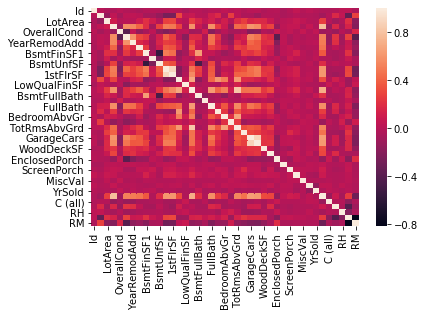

In [178]:
sns.heatmap(prices.corr())

In [170]:
prices_fix.dtypes

Id                 int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
C (all)            int64
FV                 int64
RH                 int64
RL                 int64


- Now that we only have numeric types and looking to the coorelation map there doesn't look like the values are coorelated we can proceed to the model analisys.

- First lest separate the data in train and test:


In [207]:
X = prices_fix.drop("SalePrice", axis = 1)
y = prices_fix["SalePrice"]

- Since all the values have different scales first I'll scale the values.

In [209]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)

- Now lets test the linear regression model:

In [ ]:
from sklearn.pipeline import make_pipeline

for k in range(1,8):
    poly_model = make_pipeline (PolynomialFeatures(k), LinearRegression())
    model = poly_model.fit(X_std, y)

    print(k, poly_model.score(X_test, y_test))
    


1 0.8386402071583854
2 0.9662031037645362
3 1.0


In [ ]:
regr = LinearRegression()

model = regr.fit(X, y)
y_pred = regr.predict(X_test)
model.score(X_test, y_test)



In [ ]:
cv_results = cross_val_score(lr, X, y, cv=5) 
cv_results

In [ ]:
confusion_matrix(y_test, y_pred)

- From this point I'm just gonna right my next steps.

1) Try the same process with the models: 
    - Decision Tree Regression
    - Knn Regression

2) Evaluate what was the model with better performace